In [ ]:
import pandas as pd

data = pd.read_excel("banco_chile.xlsx")

data.head()

In [ ]:
data.shape

In [ ]:
data.describe()

In [ ]:
# Para clasificar primero debemos separar en 2 variables independiente y dependiente
# X = variables independientes 
# y = variable dependiente, que es la que quiero predecir o clasificar


# creacion de variables independientes
X = data.drop('Historial Crediticio', axis=1) 
# creacion de la variable dependiente
y = data['Historial Crediticio']


In [ ]:
# creacion de la variable dependiente

y = data['Historial Crediticio']

y


In [ ]:
# seperar los datos en conjunto de entrenamiento y prueba 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train) # datos de entrenamiento estandarizados
X_test = sc.transform(X_test) # datos de prueba estandarizados con los parametros de X_train

# KNN
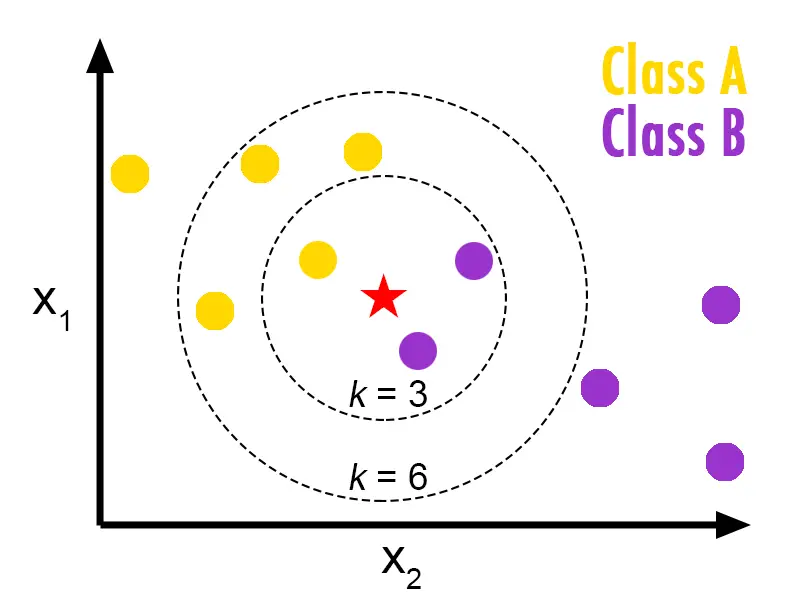

In [ ]:
# Defino el modelo KNN
from sklearn.neighbors import KNeighborsClassifier

# Crear el modelo con un valor de k=5
knn = KNeighborsClassifier(n_neighbors=5)

# entrenar el modelo con los datos correspondientes
knn.fit(X_train, y_train)


In [ ]:
y_pred_knn = knn.predict(X_test)

y_pred_knn

In [ ]:
from sklearn.metrics import accuracy_score

# evaluacion del modelo segun su exactitud
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_knn

In [ ]:
# Obtener las clases
class_names = knn.classes_

# Predecir con el conjunto de prueba
y_pred = knn.predict(X_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión con un mapa de calor
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Calcular y mostrar todas las métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=class_names))

# Arbol de Clasificacion

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Inicializar el clasificador de árbol de decisión
dt = DecisionTreeClassifier(random_state=42)

In [ ]:
# Entrenar el clasificador con el conjunto de entrenamiento
dt.fit(X_train, y_train)

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred_dt = dt.predict(X_test)

y_pred_dt

In [ ]:
# Calcular la precisión del modelo
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_dt

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
# Inicializar el clasificador Naive Bayes
nb = GaussianNB()

In [ ]:
# Entrenar el modelo
nb.fit(X_train, y_train)


In [ ]:
# Predecir las etiquetas de los datos de prueba
y_pred_nb = nb.predict(X_test)
y_pred_nb

In [ ]:
# Calcular la precisión, matriz de confusión y reporte de clasificación
accuracy = accuracy_score(y_test, y_pred_nb)
accuracy

# Bosques Aleatorios (Random Forest)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Inicializar el clasificador Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Entrenar el modelo
rf.fit(X_train, y_train)

In [ ]:
# Predecir las etiquetas de los datos de prueba
y_pred_rf = rf.predict(X_test)

y_pred_rf

In [ ]:
# Calcular la precisión, matriz de confusión y reporte de clasificación
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf

# Maquina de Soporte Vectorial (SVM)

In [ ]:
from sklearn.svm import SVC

# Inicializar el clasificador SVM
svm = SVC(kernel='linear', C=1.0, random_state=42)

In [ ]:
# Entrenar el modelo
svm.fit(X_train, y_train)

In [ ]:
# Predecir las etiquetas de los datos de prueba
y_pred_svm = svm.predict(X_test)
y_pred_svm

In [ ]:
# Calcular la precisión, matriz de confusión y reporte de clasificación
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_svm

# Perceptron Multicapa (MLP)

In [ ]:
from sklearn.neural_network import MLPClassifier

# Inicializar el clasificador MLP (Perceptrón Multicapa)
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=300, random_state=42)

In [ ]:
# Entrenar el modelo
mlp.fit(X_train, y_train)

In [ ]:
# Predecir las etiquetas de los datos de prueba
y_pred_mlp = mlp.predict(X_test)
y_pred_mlp

In [ ]:
# Calcular la precisión
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
accuracy_mlp

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tabulate import tabulate

# Supongamos que 'y_test' contiene tus etiquetas verdaderas y 'models_predictions' tus predicciones para cada modelo
models_predictions = {
    "KNN": y_pred_knn,
    "Naive Bayes": y_pred_nb,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "SVM": y_pred_svm,
    "MLP": y_pred_mlp
}

# Lista para almacenar las métricas de cada modelo
metrics = []

# Calcular métricas para cada modelo y añadir a la lista
for model_name, model_pred in models_predictions.items():
    model_metrics = [
        model_name,
        accuracy_score(y_test, model_pred),
        precision_score(y_test, model_pred, average='weighted'),
        recall_score(y_test, model_pred, average='weighted'),
        f1_score(y_test, model_pred, average='weighted')
    ]
    metrics.append(model_metrics)

# Crear la tabla con tabulate
headers = ["Algoritmo", "Exactitud", "Precisión", "Sensibilidad", "Medida F1"]
print(tabulate(metrics, headers=headers, tablefmt="fancy_grid"))
